In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AdidasVsNike.csv", low_memory=False, parse_dates=True)

In [3]:
cols = ["Listing Price", "Sale Price", "Discount", "Rating", "Reviews"]

In [4]:
df.Brand.unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [5]:
# Adidas Adidas ORIGINALS error
df.Brand.value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

In [6]:
df["Brand"] = df["Brand"].replace("Adidas Adidas ORIGINALS", "Adidas ORIGINALS")

In [7]:
# ✅
df.Brand.value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             908
Nike                         643
Adidas SPORT PERFORMANCE     606
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["LE_Brand"] = le.fit_transform(df.Brand)

In [9]:
X, y = df[cols], df["LE_Brand"]

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [11]:
X = pca.fit_transform(X)

In [12]:
from sklearn.cluster import KMeans

n_clusers = y.unique().shape[0]
km = KMeans(n_clusters=n_clusers, random_state=42,)

labels = km.fit_predict(X)

/Users/akmalsoliev/Coding/work/Python-Data-Science/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


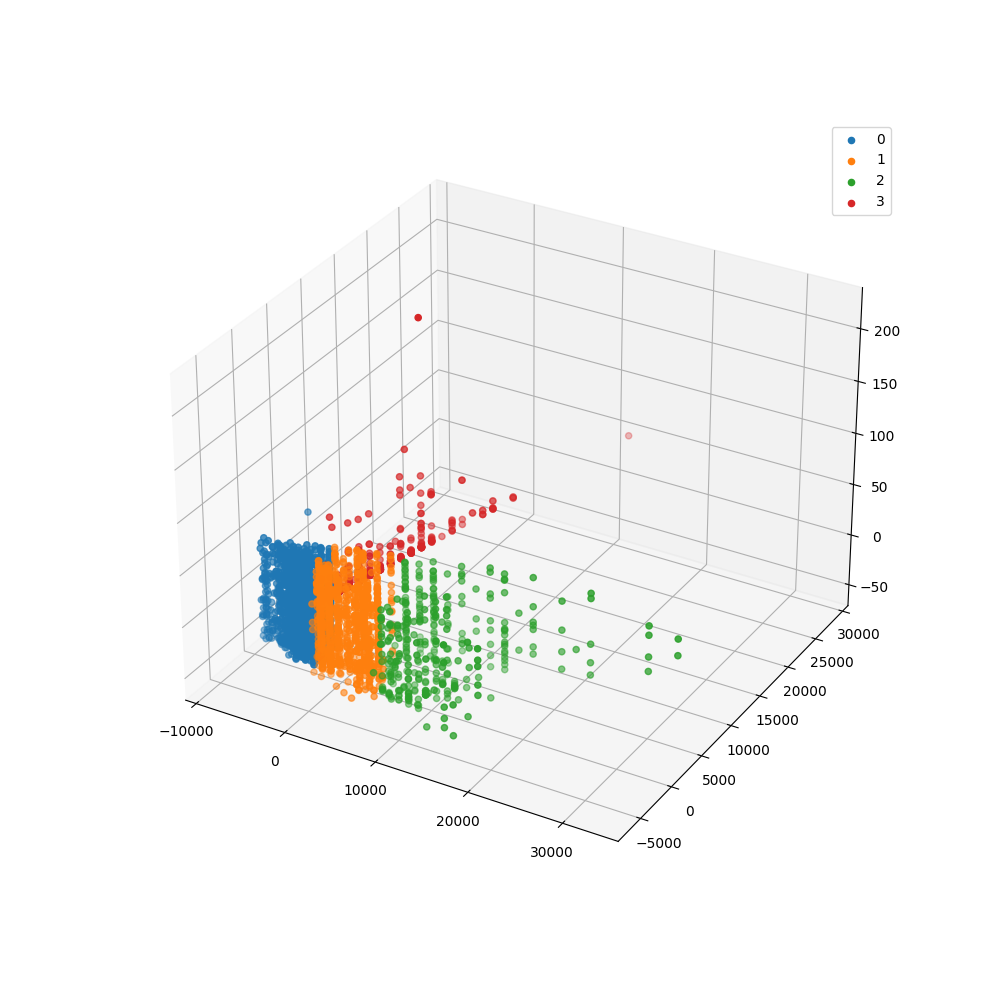

In [14]:
%matplotlib ipympl
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(projection='3d')
for i in range(n_clusers):  # Ensure n_clusers is defined
    ax.scatter(X[labels == i, 0], X[labels == i, 1], X[labels == i, 2], label=str(i))

ax.legend()
plt.show()

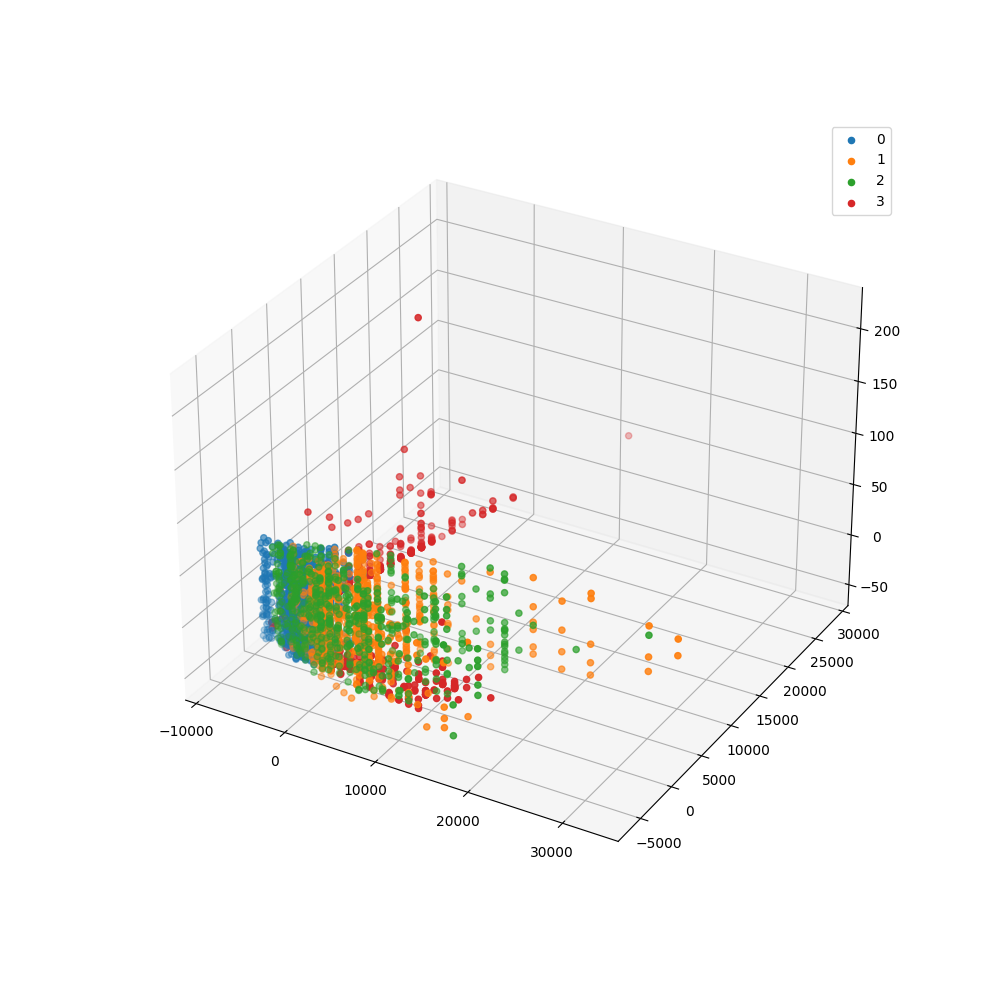

In [15]:
%matplotlib ipympl
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(projection='3d')
for i in range(n_clusers):  # Ensure n_clusers is defined
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], label=str(i))

ax.legend()
plt.show()